# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50) #was 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 47


In [3]:
cities

['taolanaro',
 'rikitea',
 'yellowknife',
 'sao filipe',
 'ushuaia',
 'suzaka',
 'vestbygda',
 'nanortalik',
 'cidreira',
 'bolshegrivskoye',
 'arraial do cabo',
 'saint george',
 'mahajanga',
 'viedma',
 'najran',
 'kruisfontein',
 'new norfolk',
 'saint-philippe',
 'bredasdorp',
 'puerto ayora',
 'dikson',
 'tadine',
 'pevek',
 'longyearbyen',
 'saint-augustin',
 'kaitangata',
 'clyde river',
 'lolua',
 'ribeira grande',
 'poum',
 'bayevo',
 'olafsvik',
 'bethel',
 'forbes',
 'butaritari',
 'skibbereen',
 'abha',
 'hithadhoo',
 'tabou',
 'stoyba',
 'alyangula',
 'tautira',
 'port hardy',
 'port alfred',
 'punta arenas',
 'grand river south east',
 'ponta do sol']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | suzaka
Processing Record 7 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | bolshegrivskoye
City not found. Skipping...
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | mahajanga
Processing Record 14 of Set 1 | viedma
Processing Record 15 of Set 1 | najran
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | puerto ayora
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          41
Lat           41
Lng           41
Max Temp      41
Humidity      41
Cloudiness    41
Wind Speed    41
Country       41
Date          41
dtype: int64

In [6]:
#print(city_url)

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,299.09,73,10,4.65,PF,1681514371
1,yellowknife,62.4560,-114.3525,274.12,92,100,3.86,CA,1681514128
2,sao filipe,14.8961,-24.4956,297.03,78,29,2.42,CV,1681514371
3,ushuaia,-54.8000,-68.3000,277.96,65,20,7.72,AR,1681514371
4,suzaka,36.6500,138.3167,287.09,90,100,1.84,JP,1681514372


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,299.09,73,10,4.65,PF,1681514371
1,yellowknife,62.4560,-114.3525,274.12,92,100,3.86,CA,1681514128
2,sao filipe,14.8961,-24.4956,297.03,78,29,2.42,CV,1681514371
3,ushuaia,-54.8000,-68.3000,277.96,65,20,7.72,AR,1681514371
4,suzaka,36.6500,138.3167,287.09,90,100,1.84,JP,1681514372


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

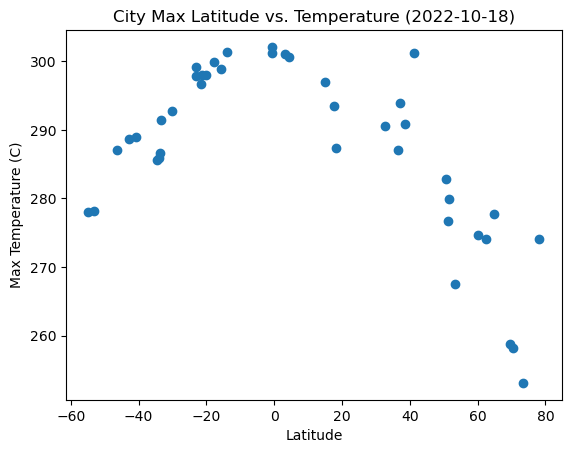

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

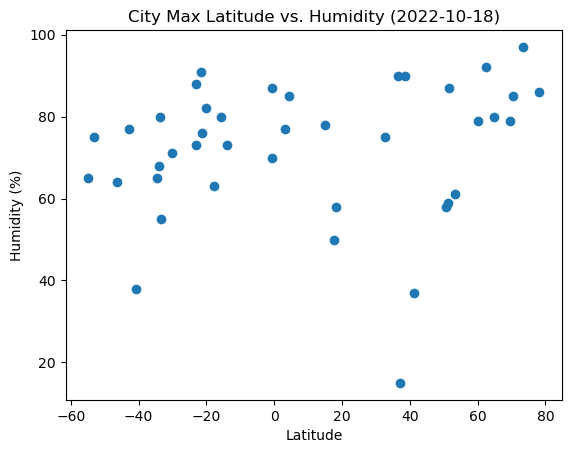

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

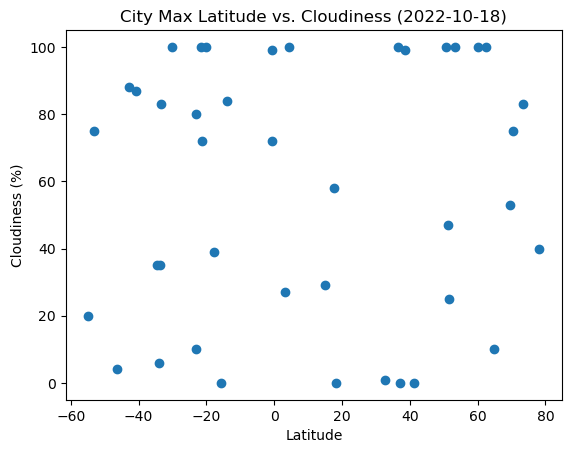

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

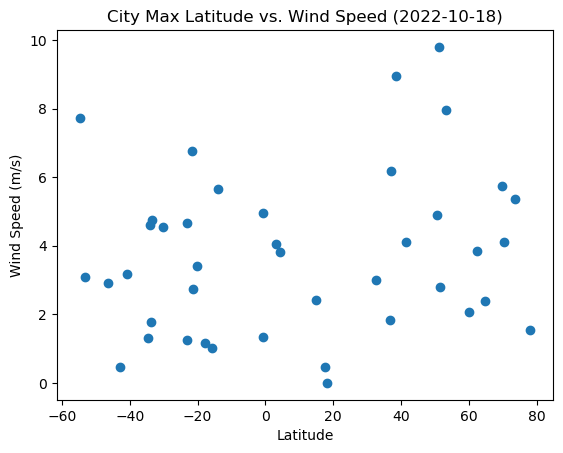

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) #linregress(x_values, y_values)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df["Lat"]>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,274.12,92,100,3.86,CA,1681514128
2,sao filipe,14.8961,-24.4956,297.03,78,29,2.42,CV,1681514371
4,suzaka,36.6500,138.3167,287.09,90,100,1.84,JP,1681514372
5,nanortalik,60.1432,-45.2371,274.63,79,100,2.06,GL,1681514372
8,saint george,37.1041,-113.5841,293.95,15,0,6.17,US,1681514373


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,299.09,73,10,4.65,PF,1681514371
3,ushuaia,-54.8000,-68.3000,277.96,65,20,7.72,AR,1681514371
6,cidreira,-30.1811,-50.2056,292.68,71,100,4.56,BR,1681514372
7,arraial do cabo,-22.9661,-42.0278,297.83,88,80,1.26,BR,1681514373
9,mahajanga,-15.7167,46.3167,298.82,80,0,1.01,MG,1681514374


###  Temperature vs. Latitude Linear Regression Plot

y = -0.54x +305.78
The r-value is: 0.7239683276930204


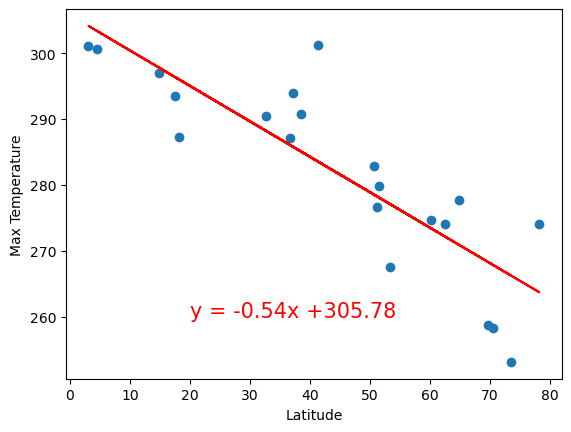

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig1_lin_reg.png")

# Show plot
plt.show()

y = 0.46x +305.78
The r-value is: 0.8595320907486055


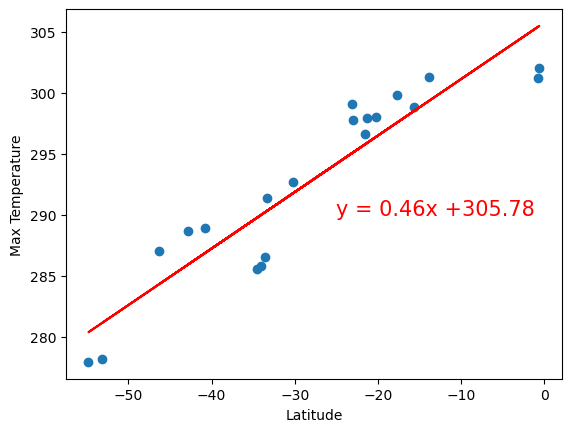

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig2_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** As the lattitude gets closer to the equator the temperature rises. This is consistent with every earth science fact I have ever learned

### Humidity vs. Latitude Linear Regression Plot

y = 0.24x +61.71
The r-value is: 0.07133343218510196


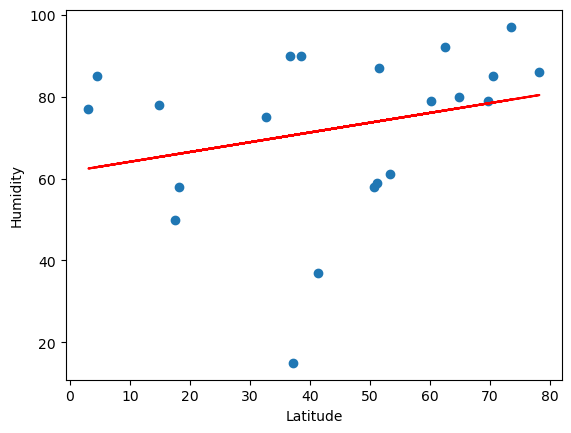

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig3_lin_reg.png")

# Show plot
plt.show()

y = 0.33x +81.23
The r-value is: 0.16469324935544014


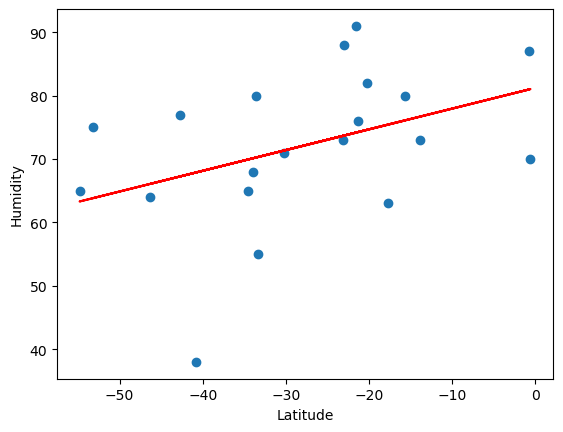

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig4_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** As the Latitude rises, the Humidity also seems to rise

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.37x +38.14
The r-value is: 0.045053899086259105


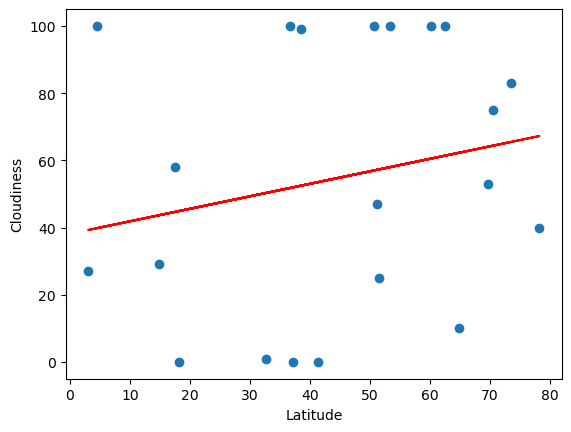

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig5_lin_reg.png")

# Show plot
plt.show()

y = -0.19x +47.42
The r-value is: 0.007572035223807504


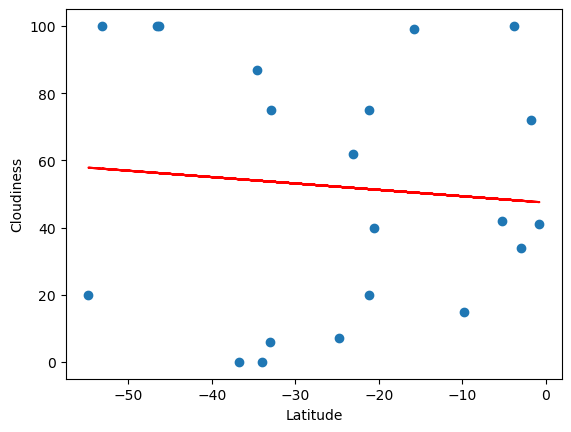

In [39]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig6_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** This one has more of a scatter than the other when compaired to cloudiness, inconclusive really.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x +3.02
The r-value is: 0.04299924808386002


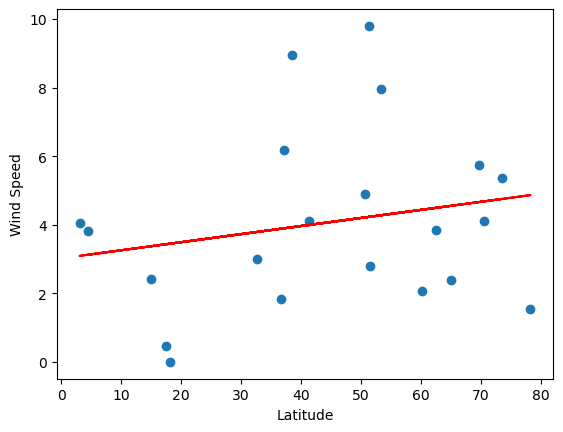

In [22]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig7_lin_reg.png")

# Show plot
plt.show()

y = -0.02x +2.93
The r-value is: 0.013232705718647245


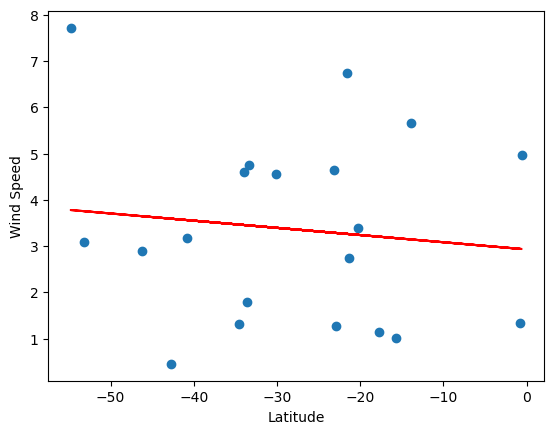

In [23]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig8_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** As the Latitude rises, the wind speed falls